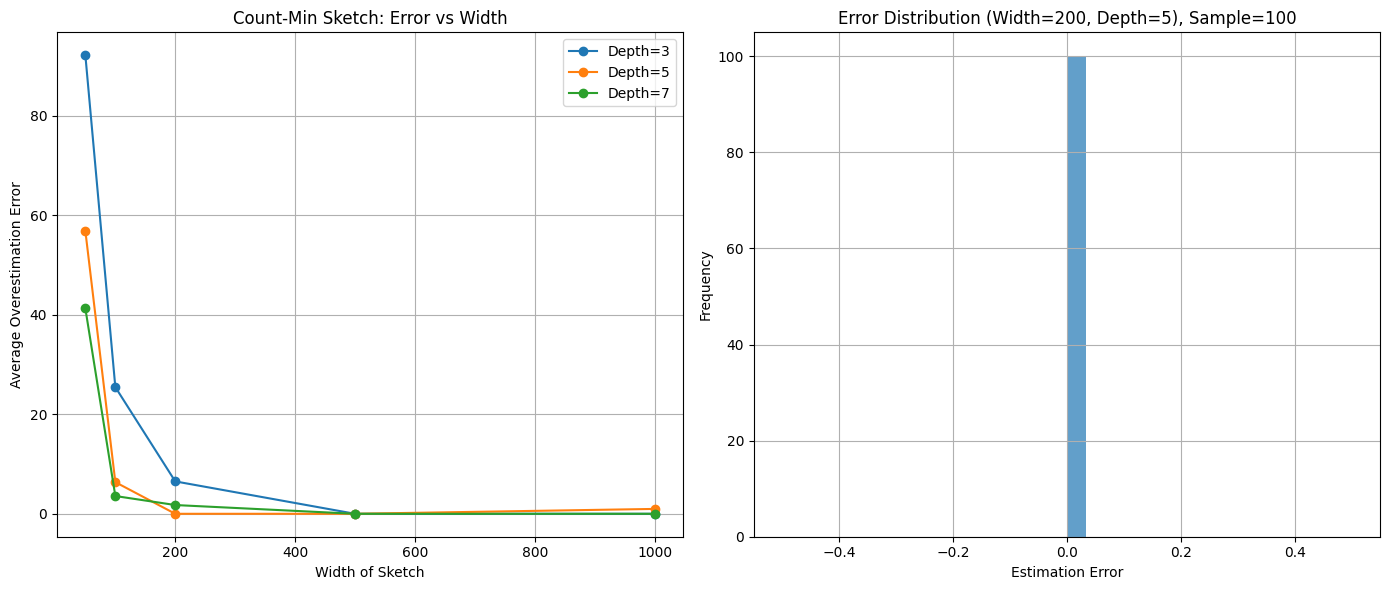

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import random

class CountMinSketch:
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.table = np.zeros((depth, width), dtype=np.int32)
        self.seeds = [random.randint(0, 1024) for _ in range(depth)]
    
    def _hash(self, item, seed):
        return (hash(str(item)) ^ seed) % self.width
    
    def update(self, item, count=1):
        for i in range(self.depth):
            pos = self._hash(item, self.seeds[i])
            self.table[i][pos] += count
    
    def estimate(self, item):
        return min(self.table[i][self._hash(item, self.seeds[i])] 
                 for i in range(self.depth))

random.seed(42)
data = [random.randint(1, 100) for _ in range(10000)]

true_counts = {}
for num in data:
    true_counts[num] = true_counts.get(num, 0) + 1

widths = [50, 100, 200, 500, 1000]
depths = [3, 5, 7]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for depth in depths:
    errors = []
    for width in widths:
        cms = CountMinSketch(width, depth)
        for num in data:
            cms.update(num)
        
        sample_size = min(100, len(true_counts))
        sample = random.sample(list(true_counts.keys()), sample_size)
        total_error = 0
        for num in sample:
            total_error += cms.estimate(num) - true_counts[num]
        avg_error = total_error / sample_size
        errors.append(avg_error)
    
    plt.plot(widths, errors, marker='o', label=f'Depth={depth}')

plt.xlabel('Width of Sketch')
plt.ylabel('Average Overestimation Error')
plt.title('Count-Min Sketch: Error vs Width')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
cms = CountMinSketch(200, 5)
for num in data:
    cms.update(num)

sample_size = min(200, len(true_counts))
sample = random.sample(list(true_counts.keys()), sample_size)
errors = []
for num in sample:
    errors.append(cms.estimate(num) - true_counts[num])

plt.hist(errors, bins=30, alpha=0.7)
plt.xlabel('Estimation Error')
plt.ylabel('Frequency')
plt.title(f'Error Distribution (Width=200, Depth=5), Sample={sample_size}')
plt.grid()

plt.tight_layout()
plt.show()

Word       Estimate   Real      
------------------------------
apple      144        144       
banana     154        154       
cherry     121        121       
date       160        160       
elderberry 120        120       
fig        171        171       
grape      130        130       


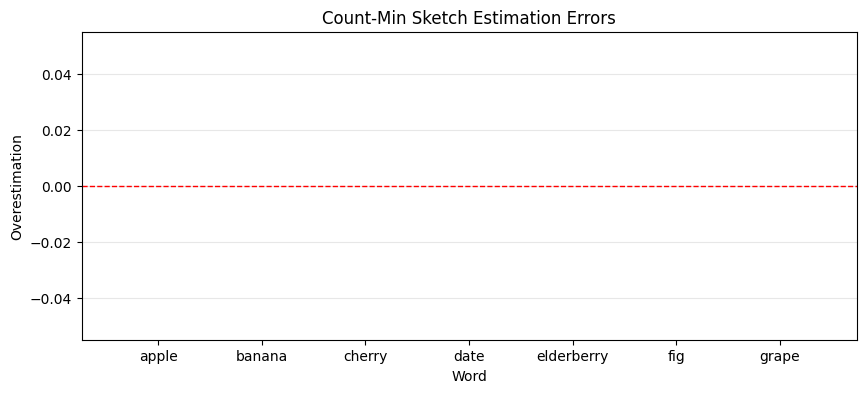

In [35]:
import random
import matplotlib.pyplot as plt

words = ["apple", "banana", "cherry", "date", "elderberry", "fig", "grape"]
test_data = [random.choice(words) for _ in range(1000)]

cms = CountMinSketch(width=50, depth=3)

for word in test_data:
    cms.update(word)

exact_counts = {}
for word in test_data:
    if word not in exact_counts:
        exact_counts[word] = 0
    exact_counts[word] += 1

print("{:<10} {:<10} {:<10}".format("Word", "Estimate", "Real"))
print("-" * 30)
for word in words:
    estimated = cms.estimate(word)
    real = exact_counts.get(word, 0)
    print("{:<10} {:<10} {:<10}".format(word, estimated, real))

errors = [cms.estimate(word) - exact_counts.get(word, 0) for word in words]
plt.figure(figsize=(10, 4))
plt.bar(words, errors, color='skyblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Count-Min Sketch Estimation Errors")
plt.ylabel("Overestimation")
plt.xlabel("Word")
plt.grid(axis='y', alpha=0.3)
plt.show()